## Analytics Vidhya - Loan Prediction Probelm

#### Importing all the requires libraries.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Import the Test and Train sets

In [77]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
print('Shape of test dataset:',test.shape)
print('Shape of train dataset:',train.shape)

Shape of test dataset: (367, 12)
Shape of train dataset: (614, 13)


#### Check all the column names

In [79]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Outlier detection and removal using Box plots

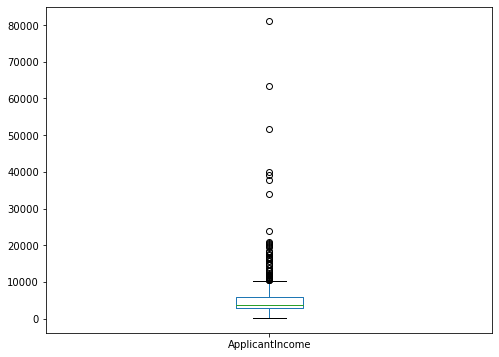

In [80]:
train['ApplicantIncome'].plot(kind='box', figsize=(8, 6))

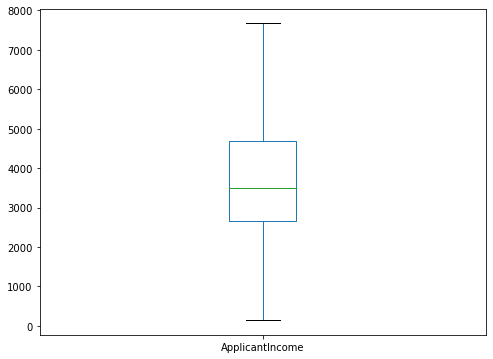

In [81]:
train = train[train['ApplicantIncome']<7740]
train['ApplicantIncome'].plot(kind='box', figsize=(8, 6))

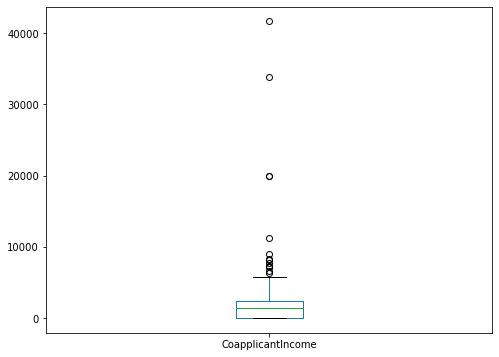

In [82]:
train['CoapplicantIncome'].plot(kind='box', figsize=(8, 6))

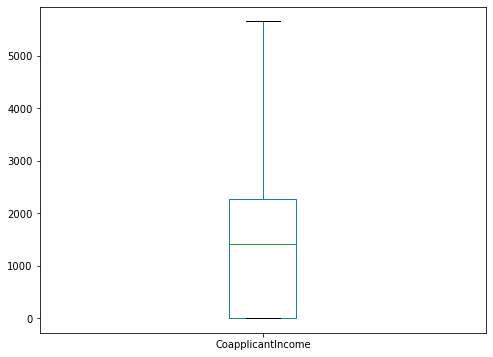

In [83]:
train = train[train['CoapplicantIncome']<5701]
train['CoapplicantIncome'].plot(kind='box', figsize=(8, 6))

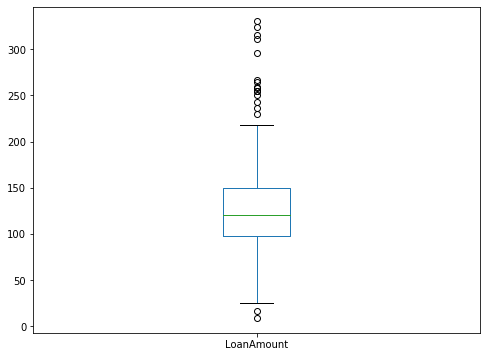

In [84]:
train['LoanAmount'].plot(kind='box', figsize=(8, 6))

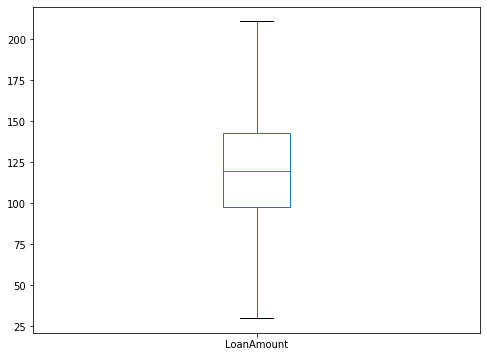

In [85]:
train = train[train['LoanAmount']<216]
train = train[train['LoanAmount']>26]
train['LoanAmount'].plot(kind='box', figsize=(8, 6)) 

#### Determining Nan values in the dataset

In [86]:
print(train['LoanAmount'].isnull().value_counts())
print(train['Gender'].isnull().value_counts())
print(train['Married'].isnull().value_counts())
print(train['Dependents'].isnull().value_counts())
print(train['Education'].isnull().value_counts())
print(train['Self_Employed'].isnull().value_counts())
print(train['ApplicantIncome'].isnull().value_counts())
print(train['CoapplicantIncome'].isnull().value_counts())
print(train['Loan_Amount_Term'].isnull().value_counts())
print(train['Credit_History'].isnull().value_counts())
print(train['Property_Area'].isnull().value_counts())
print(train['Loan_Status'].isnull().value_counts())
print('\n')
print("Sum of nan values : \n\n" ,train.isnull().sum())

False    467
Name: LoanAmount, dtype: int64
False    459
True       8
Name: Gender, dtype: int64
False    465
True       2
Name: Married, dtype: int64
False    454
True      13
Name: Dependents, dtype: int64
False    467
Name: Education, dtype: int64
False    440
True      27
Name: Self_Employed, dtype: int64
False    467
Name: ApplicantIncome, dtype: int64
False    467
Name: CoapplicantIncome, dtype: int64
False    453
True      14
Name: Loan_Amount_Term, dtype: int64
False    428
True      39
Name: Credit_History, dtype: int64
False    467
Name: Property_Area, dtype: int64
False    467
Name: Loan_Status, dtype: int64


Sum of nan values : 

 Loan_ID               0
Gender                8
Married               2
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       39
Property_Area         0
Loan_Status           0
dtype: int64


#### Count Plots using Loan_Status as hue

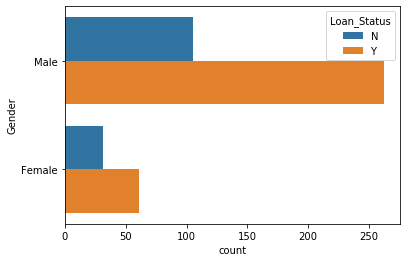

In [248]:
sns.countplot(y = 'Gender',hue= 'Loan_Status', data = train)

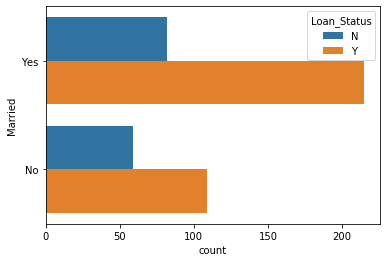

In [249]:
sns.countplot(y = 'Married',hue= 'Loan_Status', data = train)

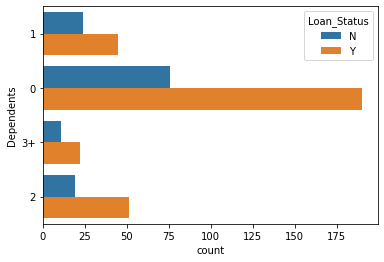

In [14]:
sns.countplot(y = 'Dependents',hue= 'Loan_Status', data = train)

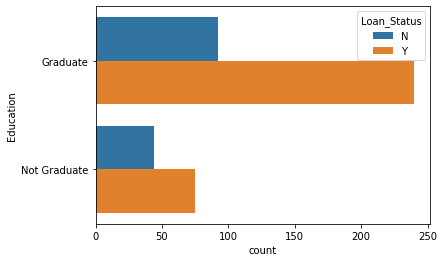

In [15]:
sns.countplot(y = 'Education',hue= 'Loan_Status', data = train)

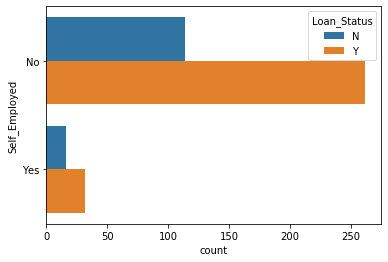

In [16]:
sns.countplot(y = 'Self_Employed',hue= 'Loan_Status', data = train)

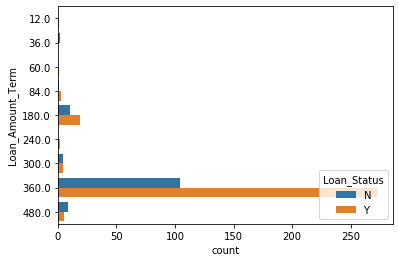

In [17]:
sns.countplot(y = 'Loan_Amount_Term',hue= 'Loan_Status', data = train)

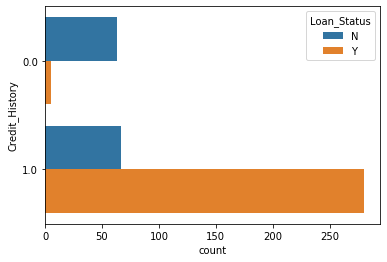

In [18]:
sns.countplot(y = 'Credit_History',hue= 'Loan_Status', data = train)

#### Facet Grid plots

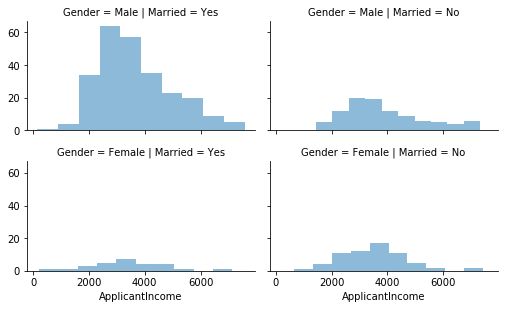

In [19]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Married', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

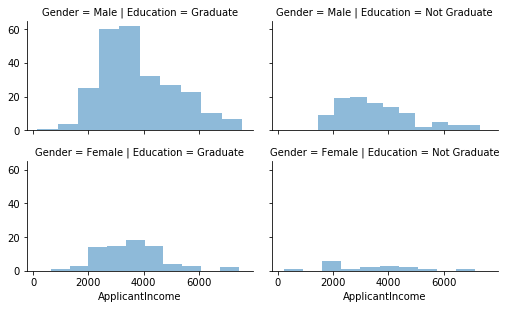

In [20]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Education', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

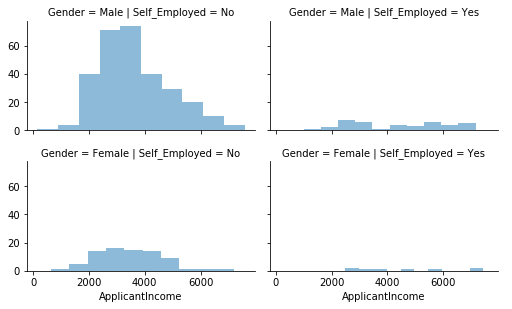

In [21]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Self_Employed', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

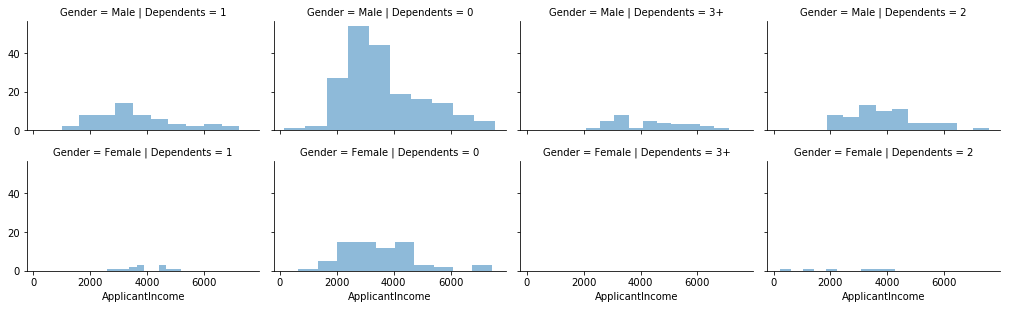

In [22]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Dependents', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

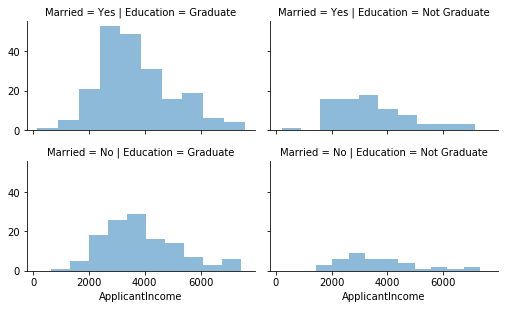

In [23]:
grid = sns.FacetGrid(train, row = 'Married', col = 'Education', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

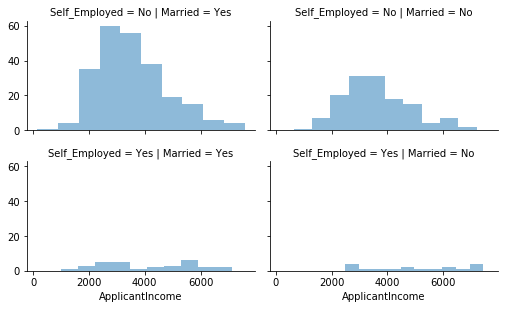

In [24]:
grid = sns.FacetGrid(train, row = 'Self_Employed', col = 'Married', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

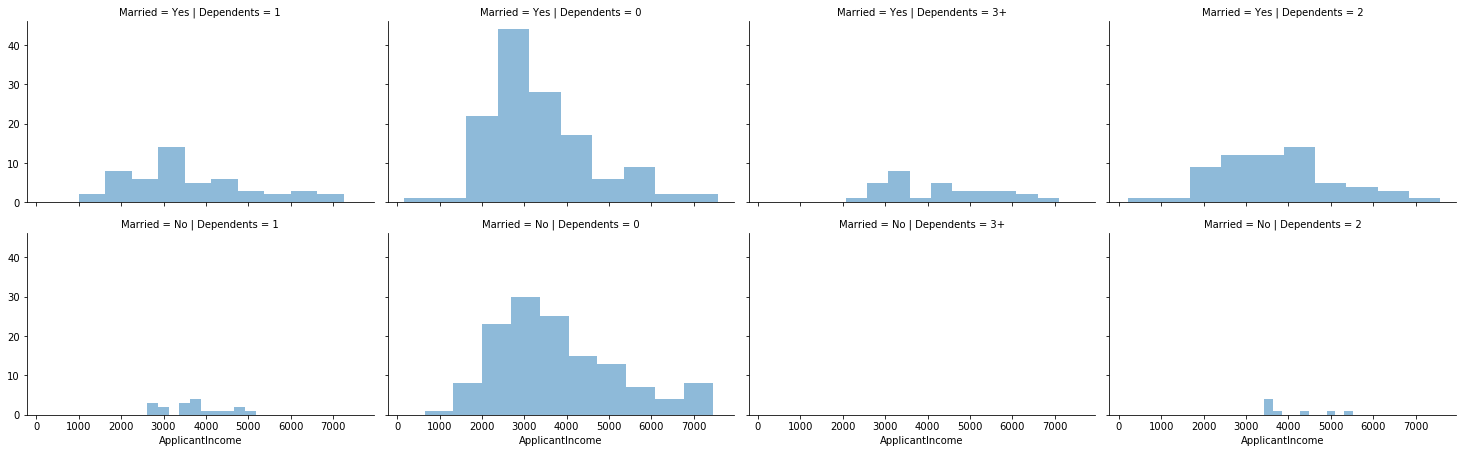

In [25]:
grid = sns.FacetGrid(train, row = 'Married', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

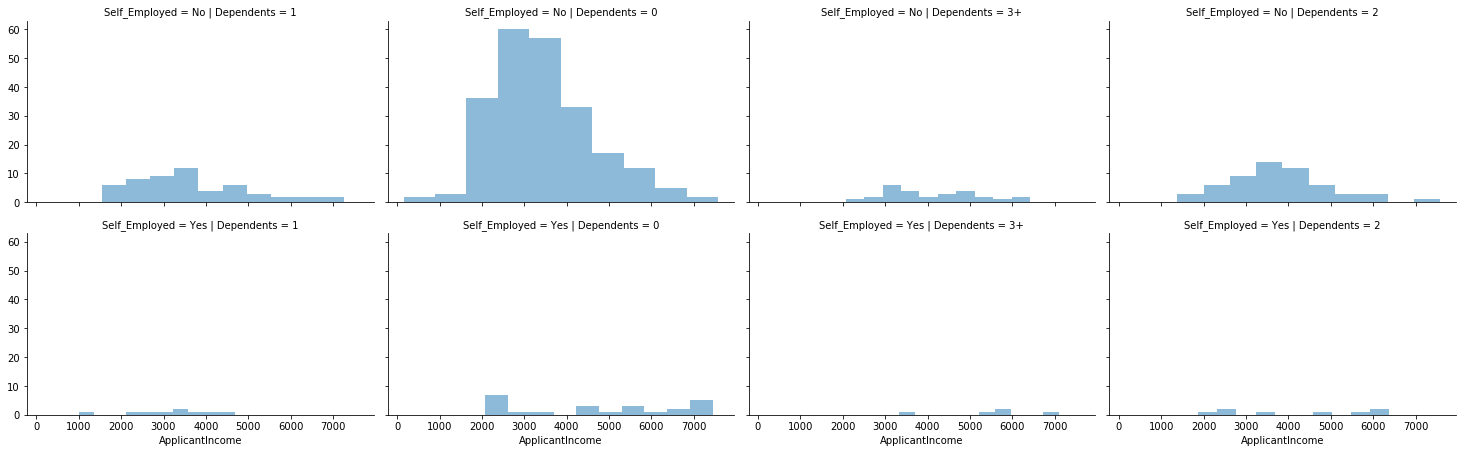

In [26]:
grid = sns.FacetGrid(train, row = 'Self_Employed', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

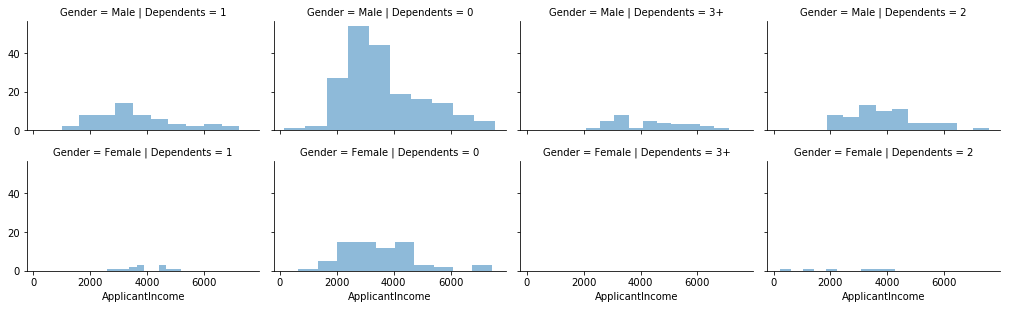

In [27]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Dependents', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

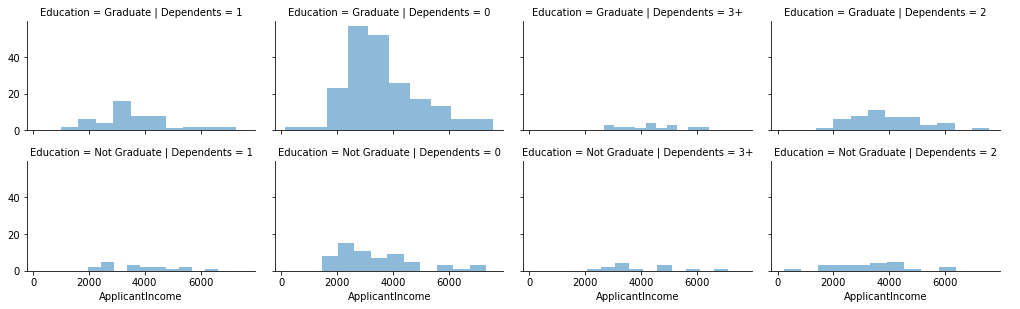

In [28]:
grid = sns.FacetGrid(train, row = 'Education', col = 'Dependents', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

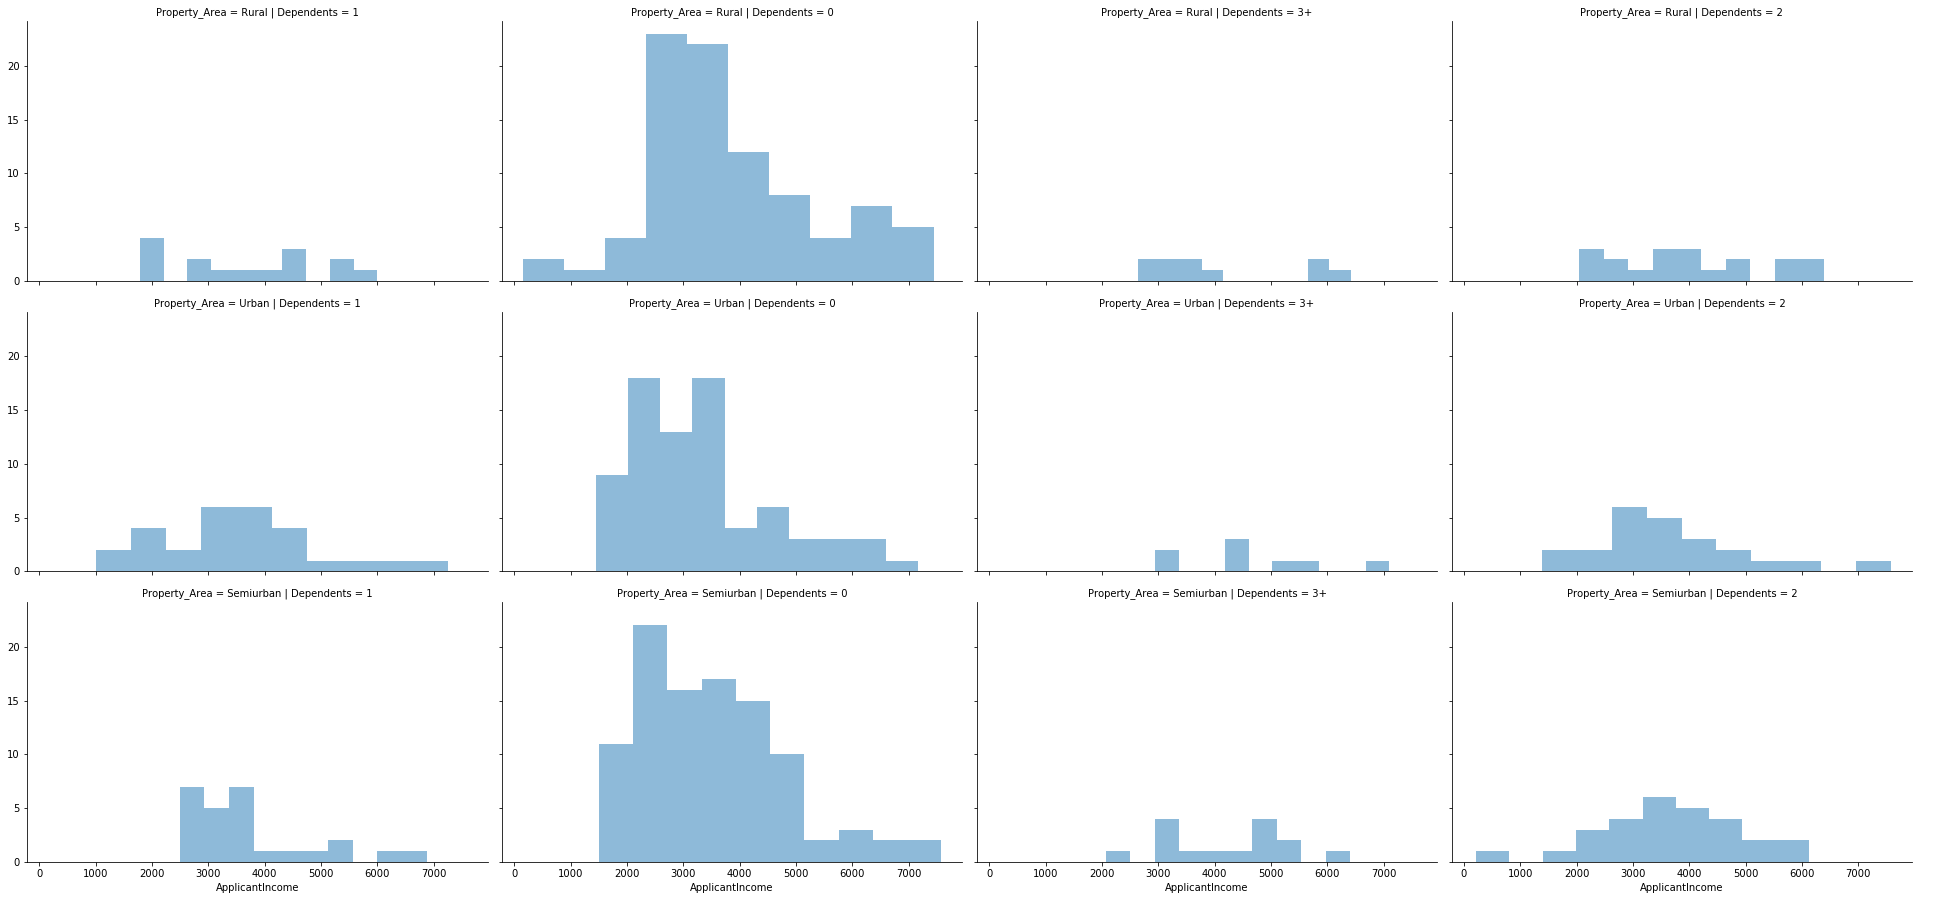

In [29]:
grid = sns.FacetGrid(train, row = 'Property_Area', col = 'Dependents', height = 4.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

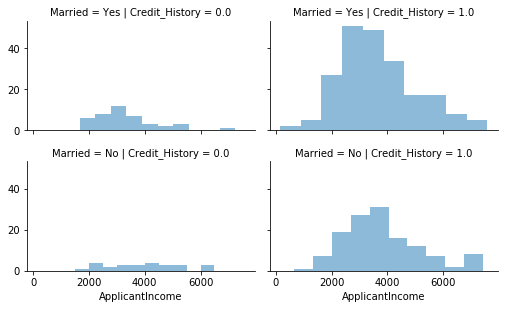

In [30]:
grid = sns.FacetGrid(train, row = 'Married', col = 'Credit_History', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

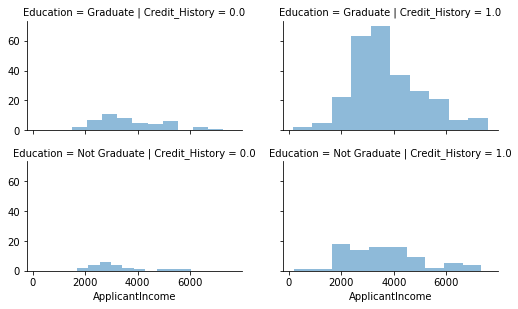

In [31]:
grid = sns.FacetGrid(train, row = 'Education', col = 'Credit_History', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

#### Getting dummies for required columns

In [87]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [88]:
train['Gender'] = pd.get_dummies(train['Gender'])
train['Married'] = pd.get_dummies(train['Married'])
train['Education'] = pd.get_dummies(train['Education'])
train['Property_Area'] = pd.get_dummies(train['Property_Area'])
train['Self_Employed'] = pd.get_dummies(train['Self_Employed'])
train['Loan_Status'] = pd.get_dummies(train['Loan_Status'])
test['Gender'] = pd.get_dummies(test['Gender'])
test['Married'] = pd.get_dummies(test['Married'])
test['Education'] = pd.get_dummies(test['Education'])
test['Property_Area'] = pd.get_dummies(test['Property_Area'])
test['Self_Employed'] = pd.get_dummies(test['Self_Employed'])

Check the dataset info.

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            467 non-null    object 
 1   Gender             467 non-null    uint8  
 2   Married            467 non-null    uint8  
 3   Dependents         454 non-null    object 
 4   Education          467 non-null    uint8  
 5   Self_Employed      467 non-null    uint8  
 6   ApplicantIncome    467 non-null    int64  
 7   CoapplicantIncome  467 non-null    float64
 8   LoanAmount         467 non-null    float64
 9   Loan_Amount_Term   453 non-null    float64
 10  Credit_History     428 non-null    float64
 11  Property_Area      467 non-null    uint8  
 12  Loan_Status        467 non-null    uint8  
dtypes: float64(4), int64(1), object(2), uint8(6)
memory usage: 31.9+ KB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    uint8  
 2   Married            367 non-null    uint8  
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    uint8  
 5   Self_Employed      367 non-null    uint8  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    uint8  
dtypes: float64(3), int64(2), object(2), uint8(5)
memory usage: 22.0+ KB


#### Fixing and filling the incomplete and inappropriate values

Fixing and checking values of the Dependents column.

In [91]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
train['Dependents'].replace(np.nan,train['Dependents'].mode().values[0], inplace = True) # Filled with mode
test['Dependents'] = test['Dependents'].str.rstrip('+')
test['Dependents'].replace(np.nan,test['Dependents'].mode().values[0], inplace = True) # Filled with mode
print('Test dataset unique values: ',test['Dependents'].unique())
print('Train dataset unique values: ',test['Dependents'].unique())

Test dataset unique values:  ['0' '1' '2' '3']
Train dataset unique values:  ['0' '1' '2' '3']


Converting the remaining column values to int datatype.

In [92]:
train['Gender'] = train['Gender'].astype(int)
train['Married'] = train['Married'].astype(int)
train['Education'] = train['Education'].astype(int)
train['Property_Area'] = train['Property_Area'].astype(int)
train['Self_Employed'] = train['Self_Employed'].astype(int)
train['Loan_Status'] = train['Loan_Status'].astype(int)
train['Dependents'] = train['Dependents'].astype(int)
test['Gender'] = test['Gender'].astype(int)
test['Married'] = test['Married'].astype(int)
test['Education'] = test['Education'].astype(int)
test['Property_Area'] = test['Property_Area'].astype(int)
test['Self_Employed'] = test['Self_Employed'].astype(int)
test['Dependents'] = test['Dependents'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            467 non-null    object 
 1   Gender             467 non-null    int64  
 2   Married            467 non-null    int64  
 3   Dependents         467 non-null    int64  
 4   Education          467 non-null    int64  
 5   Self_Employed      467 non-null    int64  
 6   ApplicantIncome    467 non-null    int64  
 7   CoapplicantIncome  467 non-null    float64
 8   LoanAmount         467 non-null    float64
 9   Loan_Amount_Term   453 non-null    float64
 10  Credit_History     428 non-null    float64
 11  Property_Area      467 non-null    int64  
 12  Loan_Status        467 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 51.1+ KB


#### Fill the missing values with appropriate measures

In [93]:
train['LoanAmount'].replace(np.nan,train['LoanAmount'].mean(), inplace = True) # Filled with mean
test['LoanAmount'].replace(np.nan,test['LoanAmount'].mean(), inplace = True) # Filled with mean
train['LoanAmount'].isnull().value_counts()
print(train['LoanAmount'].unique())
train['Credit_History'].replace(np.nan,train['Credit_History'].mode().values[0], inplace = True) # Filled with mode
test['Credit_History'].replace(np.nan,test['Credit_History'].mode().values[0], inplace = True) # Filled with mode
train['Credit_History'].isnull().value_counts()
print(train['Credit_History'].unique())
train['Loan_Amount_Term'].replace(np.nan,train['Loan_Amount_Term'].mode().values[0], inplace = True) # Filled with mode
test['Loan_Amount_Term'].replace(np.nan,test['Loan_Amount_Term'].mode().values[0], inplace = True) # Filled with mode
train['Loan_Amount_Term'].isnull().value_counts()
print(train['Loan_Amount_Term'].unique())

[128.  66. 120. 141.  95. 158. 168.  70. 109. 114. 125. 100.  76. 133.
 115. 104. 116. 112. 151. 122. 110.  35. 201.  74. 106. 144.  80.  47.
  75. 134.  96.  88.  44.  97. 135.  99. 165. 126. 136. 172.  81. 187.
 113. 176. 180. 130. 111. 167.  50. 175. 131. 188. 137. 160.  94. 139.
 152. 118. 154.  85. 194.  93. 182. 102.  84. 129. 185.  30.  98. 121.
  63.  87. 101.  67.  73. 108.  58.  48. 170.  90. 166. 124.  55.  59.
 127.  72.  60. 138. 210. 200.  42. 140. 123. 155. 150. 207.  78.  54.
  89. 143. 105. 132.  56. 159. 184. 117.  71. 173.  46. 156. 103.  45.
  65.  53.  62. 178. 148. 190. 149. 153. 162. 186. 119. 107. 209. 208.
 161. 157. 145. 181. 211. 205.  36.  61. 146. 142. 192.  40.]
[1. 0.]
[360. 240. 180.  60. 300. 480.  36.  84.  12.]


#### Generate the corelation heat map using seaborn

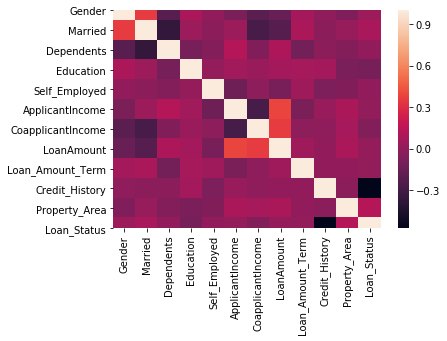

In [98]:
sns.heatmap(train.corr())

#### Create X and y sets from the train set

In [99]:
y = train['Loan_Status']
test = test.drop('Loan_ID', axis = 1)
X = train.drop('Loan_ID', axis = 1)
X = X.drop('Loan_Status', axis = 1)
slc= StandardScaler()
X_train_std = slc.fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Train the model using GridSearchCV with LogisticRegression

Model with train_test_split.

In [22]:
# X = np.asanyarray(X)
# y = np.asanyarray(y)
# grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
# ts_rs = []
# ts = np.arange(0,1,0.01)
# for i in range(10):
#     for j in range(10):
#         X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = ts[i], random_state = j)
#         LR = LogisticRegression(solver = 'liblinear')
#         GS = GridSearchCV(LR, grid, cv = 4)
#         GS.fit(X_train,y_train)
#         best_est=GS.best_estimator_
#         ts_rs.append(ts[i])
#         ts_rs.append(j)
#         ts_rs.append(GS.best_score_)
#         # y_pred = pd.DataFrame(GS.predict(X_test))
# # ts_rs.sort()
# ts_rs

#### Using the given test and train sets.

In [102]:
train = np.asanyarray(train)
test = np.asanyarray(test)
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
LR = LogisticRegression(solver = 'liblinear')
GS = GridSearchCV(LR, grid, cv = 4)
GS.fit(X_train_std, y)
BestRR=GS.best_estimator_
print("This is the best estimator :" ,'{ ',BestRR,' }')
print('This is the best score :',GS.best_score_)
y_pred = pd.DataFrame(GS.predict(test))
y_pred[0] = y_pred[0].map({1:'N', 0:'Y'})
y_pred.head()

This is the best estimator : {  LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)  }
This is the best score : 0.8265524625267666


,0
0,N
1,Y
2,Y
3,Y
4,N


#### Append the predicted values in the submission dataset and save in the Submission dataset.

In [103]:
sub = pd.read_csv('test.csv')
sub = sub[['Loan_ID']]
sub['Loan_Status'] = y_pred[0]
sub.to_csv('Submission.csv', index = False)

In [104]:
sub.head() #Submission set datadrame.

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
